# Text_Mining :- amazon_data

In [26]:
import numpy as np 
import pandas as pd 
import string 
import matplotlib.pyplot as plt
import seaborn as sns
import string
import spacy
from itertools import islice
%matplotlib inline

In [38]:
### Check out the Data

In [2]:
df = pd.read_csv(r'C:\Users\PRANAV\Desktop\lms\Text Mining\amazon.csv',error_bad_lines=False)
df.head()

,the comments,y
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


### EDA

In [3]:
df.drop('y', axis=1, inplace=True)

In [5]:
df.head()

,the comments
0,So there is no way for me to plug it in here i...
1,"Good case, Excellent value."
2,Great for the jawbone.
3,Tied to charger for conversations lasting more...
4,The mic is great.


In [6]:
# remove both the leading and the trailing characters
x = df['the comments']
df = [x.strip() for x in x] 
df = [x for x in df if x] 

In [7]:
text = ' '.join(df)
len(text)

56225

In [8]:
no_punc_text = text.translate(str.maketrans(' ', ' ', string.punctuation))

In [12]:
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_punc_text)

len(text_tokens)

10202

In [13]:
with open(r"C:\Users\PRANAV\Desktop\lms\Text Mining\stop.txt") as f:stop_words = f.read()

In [16]:
no_stop_tokens = [word for word in text_tokens if not word in stop_words]


In [17]:
lower_words = [x.lower() for x in no_stop_tokens]

In [18]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]

In [19]:
import en_core_web_sm
nlp = en_core_web_sm.load()

In [20]:
doc = nlp(' '.join(lower_words))

In [21]:
lemmas = [token.lemma_ for token in doc]
print(lemmas)

['so', 'plug', 'we', 'i', 'converter', 'good', 'case', 'excellent', 'great', 'jawbone', 'tie', 'charger', 'conversation', 'last', '45', 'minutesmajor', 'problem', 'the', 'mic', 'great', 'I', 'jiggle', 'plug', 'line', 'decent', 'volume', 'if', 'dozen', 'hundred', 'contact', 'imagine', 'fun', 'send', 'if', 'razr', 'owneryou', 'needless', 'I', 'waste', 'money', 'what', 'waste', 'money', 'and', 'sound', 'quality', 'great', 'he', 'impress', 'original', 'battery', 'extend', 'battery', 'if', 'seperate', '5', 'I', 'start', 'notice', 'excessive', 'static', 'garble', 'sound', 'headset', 'very', 'good', 'quality', 'the', 'design', 'odd', 'clip', 'comfortable', 'highly', 'recommend', 'blue', 'tooth', 'phone', 'I', 'advise', 'everyone', 'do', 'not', 'be', 'fool', 'so', 'far', 'so', 'good', 'work', 'great', 'it', 'click', 'make', 'mechanism', 'I', 'motorolas', 'website', 'direction', 'pair', 'I', 'buy', 'kindle', 'fire', 'absolutely', 'love', 'the', 'commercial', 'mislead', 'I', 'run', 'battery', 'b

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(lemmas)
sum_words = X.sum(axis = 0)
words_freq = ([word, sum_words[0, idx]] for word, idx in cv.vocabulary_)

In [24]:
vectorizer2 = CountVectorizer(analyzer='word')
X2 = vectorizer2.fit_transform(lemmas)

In [25]:
afinn = pd.read_csv(r"C:\Users\PRANAV\Desktop\lms\Text Mining\Afinn.csv", encoding='unicode_escape')

In [27]:
def take(n, iterable):
    return list(islice(iterable, n))

In [28]:
affinity_scores = afinn.set_index('word')['value'].to_dict()
take(20, affinity_scores.items())

[('abandon', -2),
 ('abandoned', -2),
 ('abandons', -2),
 ('abducted', -2),
 ('abduction', -2),
 ('abductions', -2),
 ('abhor', -3),
 ('abhorred', -3),
 ('abhorrent', -3),
 ('abhors', -3),
 ('abilities', 2),
 ('ability', 2),
 ('aboard', 1),
 ('absentee', -1),
 ('absentees', -1),
 ('absolve', 2),
 ('absolved', 2),
 ('absolves', 2),
 ('absolving', 2),
 ('absorbed', 1)]

In [29]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(df))

In [30]:
sent_df = pd.DataFrame(sentences, columns=['sentences'])

In [31]:
nlp = spacy.load('en_core_web_sm')

In [32]:
sentiment_lexicon = affinity_scores
def calculate_sentiment(text: str=None) -> float:
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [34]:
sent_df['sentiment_value'] = sent_df['sentences'].apply(calculate_sentiment)
sent_df['word_count'] = sent_df['sentences'].str.split().apply(len)

In [35]:
sent_df.sort_values(by = 'sentiment_value')

,sentences,sentiment_value,word_count
610,the worst phone from samsung...crap..... this ...,-9,16
436,"I might have gotten a defect, but I would not ...",-7,20
409,We received a WHITE colored battery that goes ...,-6,37
831,"Horrible, horrible protector.",-6,3
381,The worst piece of crap ever along with the Ve...,-6,12
...,...,...,...
861,It's been my choice headset for years.Great so...,9,13
149,"I know that sounds funny, but to me it seemed ...",9,21
488,I would definitely recommend the Jabra BT250v ...,9,19
37,"It has a great camera thats 2MP, and the pics ...",10,18


In [36]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off")

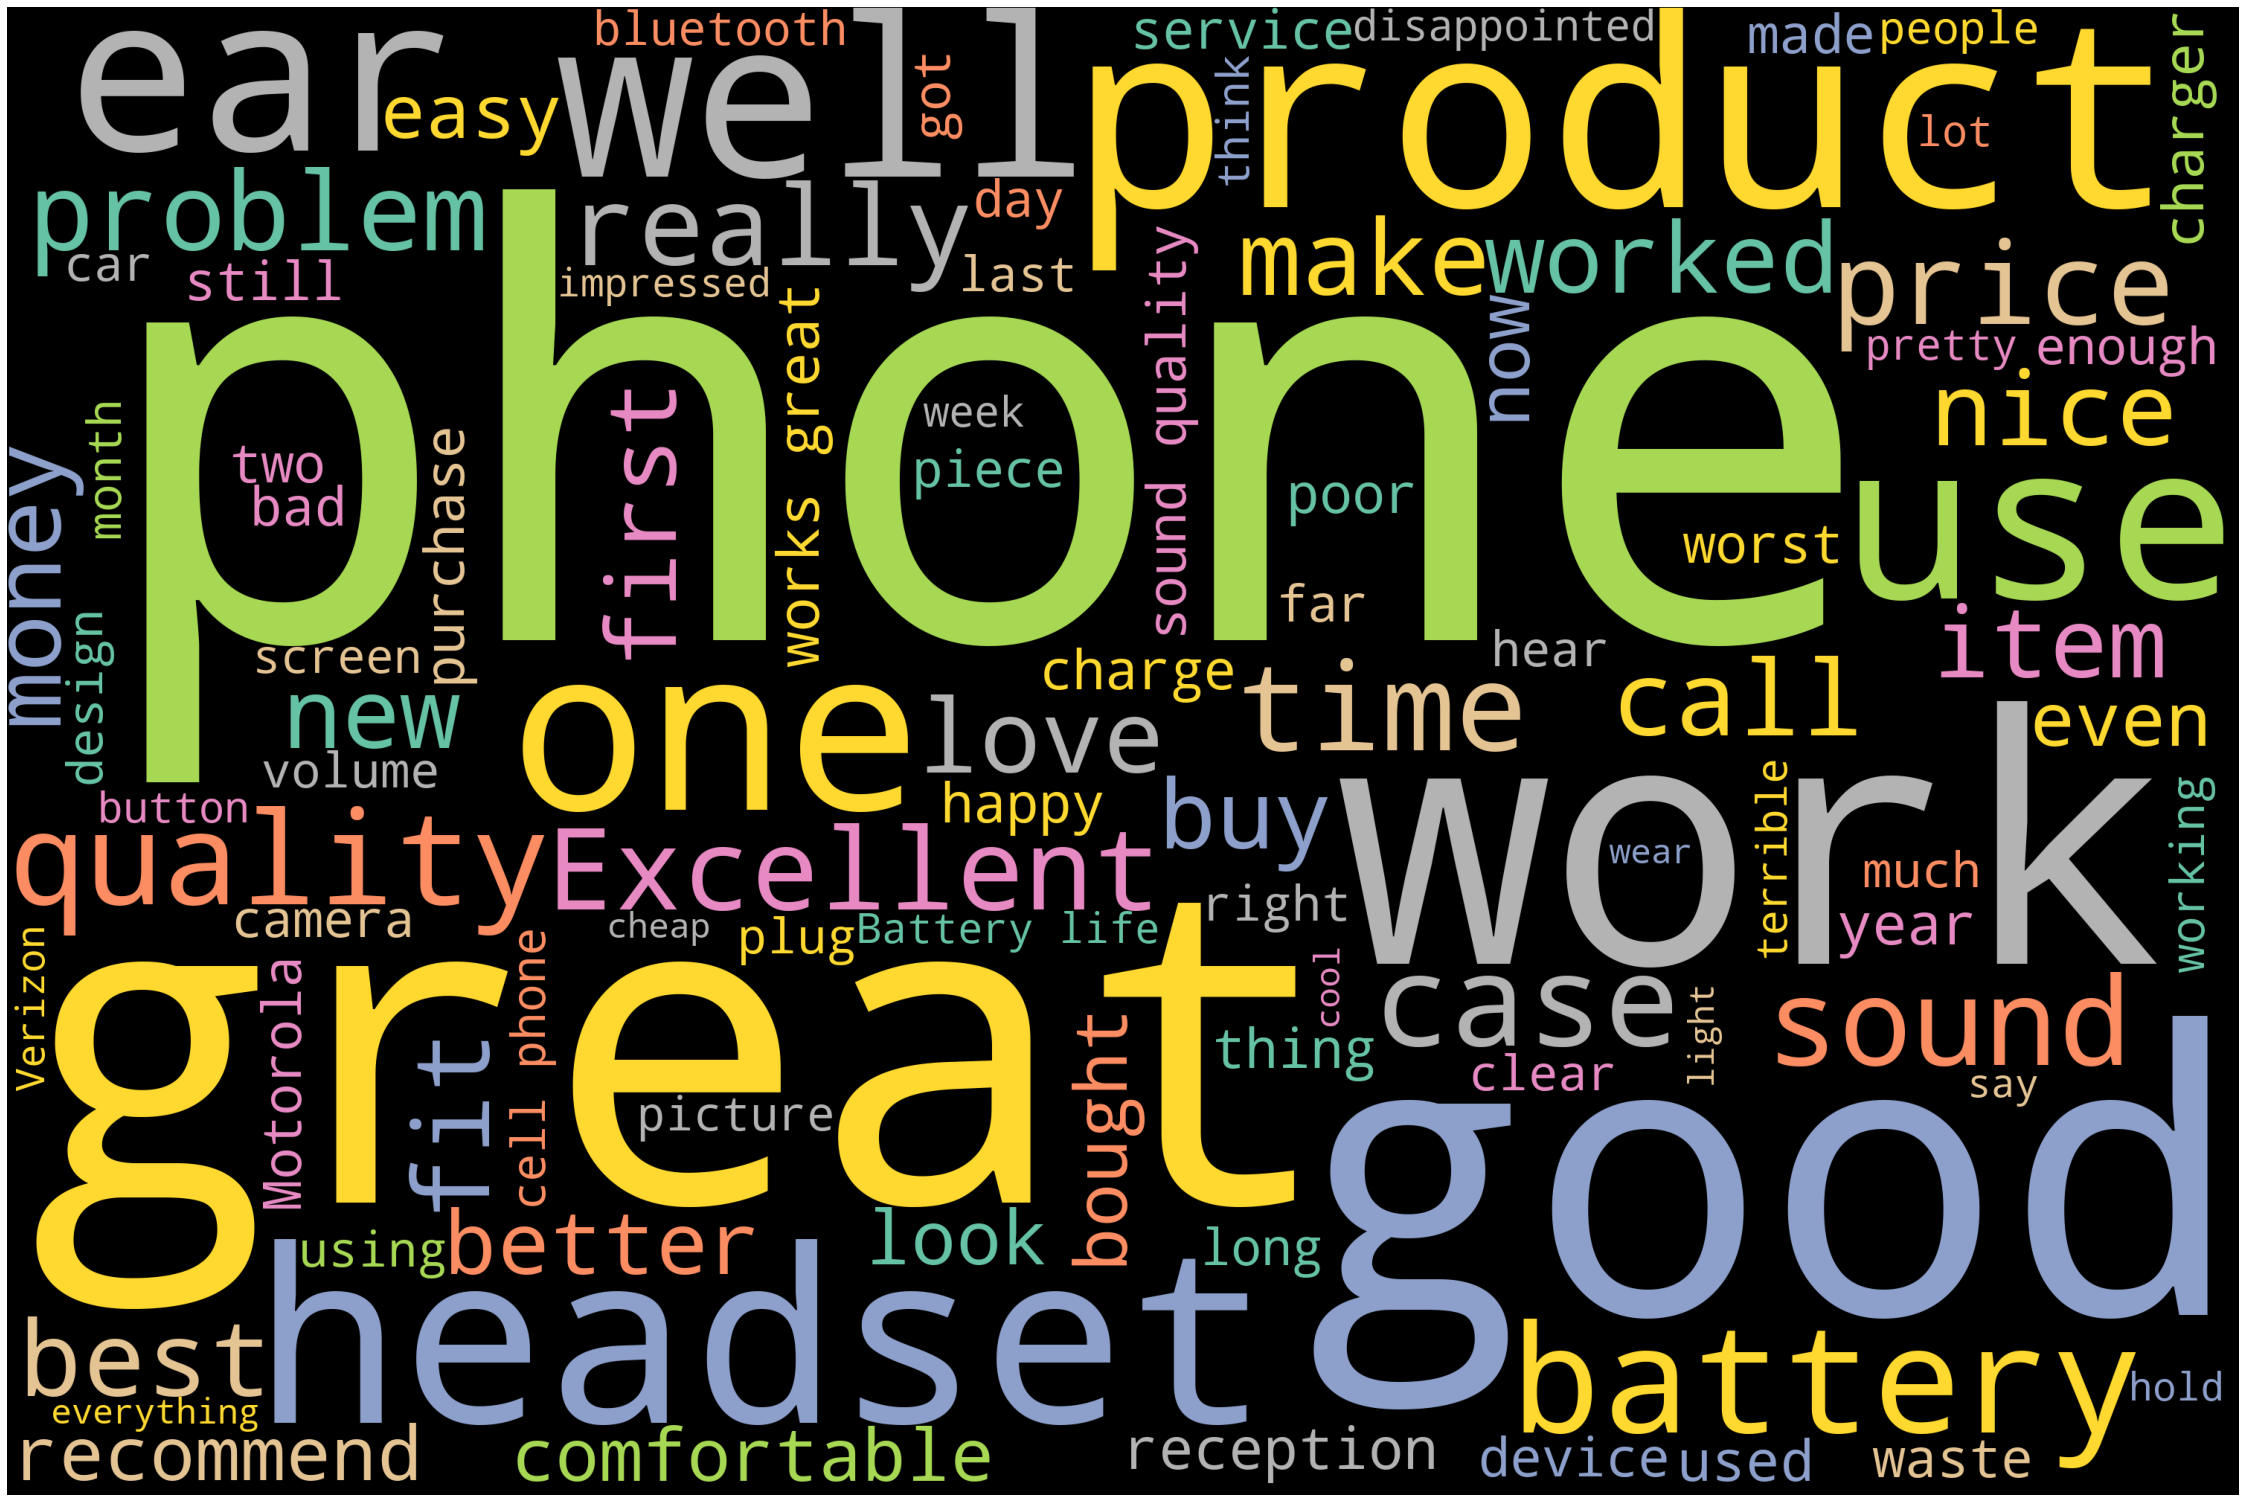

In [37]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text)
# Plot
plot_cloud(wordcloud)